In [1]:
# Load Data
data_dir = r"C:\Users\JafarSaadiq\Downloads\bike+sharing+dataset"
files = ["day.csv", "hour.csv"]

import pandas as pd, numpy as np
import os

df_day = pd.read_csv(os.path.join(data_dir, files[0]), index_col=1)
df_hour = pd.read_csv(os.path.join(data_dir, files[1]), index_col=1)

df_day.index = pd.to_datetime(df_day.index, format='%Y-%m-%d')
df_day.index.freq = 'D' # set the frequency to 'D' to ensure it's a daily frequency
df_day.drop(columns="instant", inplace=True)

# df_hour.index = pd.to_datetime(df_hour.index, format='%Y-%m-%d')
# df_hour.index.freq = 'D' # set the frequency to 'D' to ensure it's a daily frequency

### Day Data Analysis

In [2]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mean**, known as the average. Calculated by summing all values and dividing by number of values.  
**Median**, The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers). Example: The median of 4, 1, and 7 is 4 because when the numbers are put in order (1 , 4, 7) , the number 4 is in the middle.  
**Mode**, The most frequent number—that is, the number that occurs the highest number of times.  
**std**, Standard deviation is a measure of how spread out the values in a dataset are.  by taking the square root of the variance, which is the average of the squared deviations from the mean. 
- A high standard deviation indicates that the values in the dataset are spread out over a wide range.
- low standard deviation indicates that the values in the dataset are clustered close to the mean.  

**Calculation**
1. calculate the deviations of each data point from the mean, and square the result of each 
2. variance is the mean of above values 
3. standard deviation is equal to the square root of the variance.  
75%: means that 75% of values fall in it.

In [4]:
df_day.describe(percentiles=[.30, .5, .75, 1]) # 1 percentile = max

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
30%,2.000000,0.000000,4.000000,0.000000,2.000000,0.000000,1.000000,0.365217,0.363625,0.542083,0.143042,384.000000,2808.000000,3510.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
100%,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


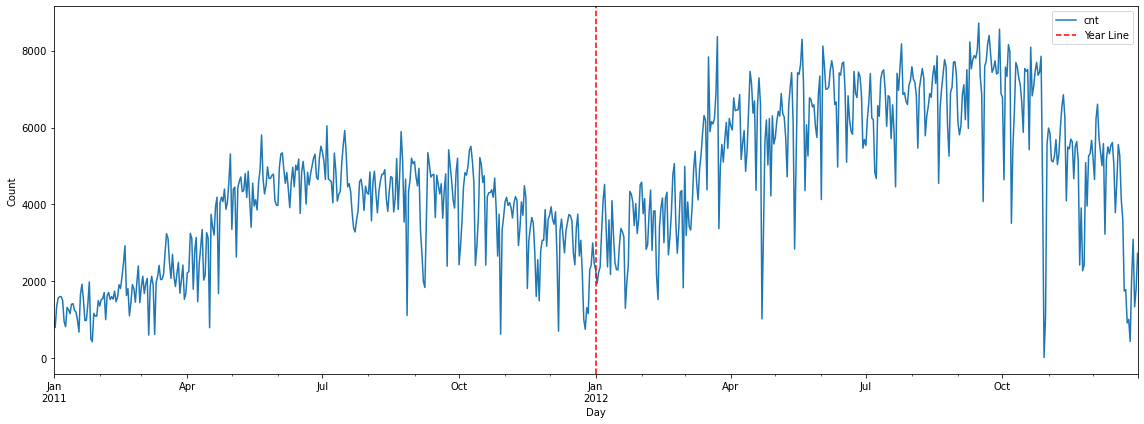

In [16]:
import matplotlib.pyplot as plt


def plotSeries(series, xlabel, ylabel):
    # You can specify the x-coordinate where you want to draw the vertical line
#     vertical_line_x = df_day[df_day.yr==0].instant.max()  # Replace with the date you want to mark

    # Create the line plot
    ax = series.plot(figsize=(16, 6))

    # Draw a vertical line at the specified x-coordinate
    ax.axvline(x="2012-01-01", color='red', linestyle='--', label='Year Line')

    # # Shade the areas before and after the vertical line
    # ax.fill_between(df_day.index, df_day['cnt'], where=(df_day.index < vertical_line_x), color='lightgray', alpha=0.5, label='Year 2011')
    # ax.fill_between(df_day.index, df_day['cnt'], where=(df_day.index >= vertical_line_x), color='lightblue', alpha=0.5, label='Year 2012')

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Show the plot
    plt.legend()
    plt.tight_layout()
    plt.show()

plotSeries(df_day["cnt"], xlabel="Day", ylabel="Count")

**quartiles**, https://www.investopedia.com/terms/q/quartile.asp

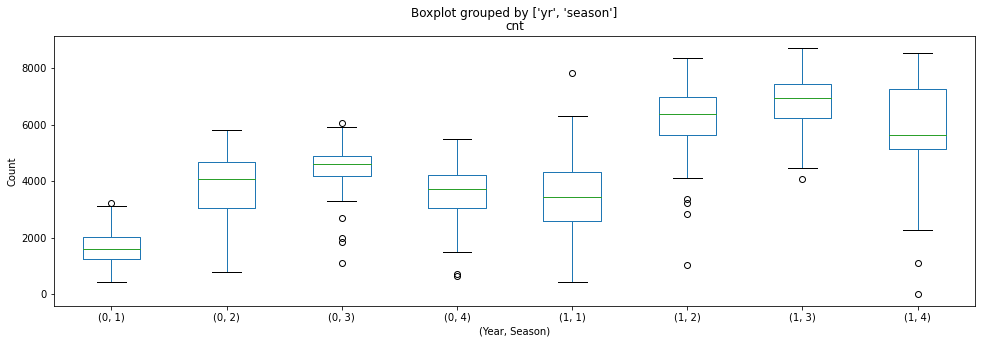

In [20]:
# Boxplot os seasons by year 
df_day.boxplot(column='cnt', by=["yr", 'season'], grid=False, figsize=(16, 5), xlabel="(Year, Season)", ylabel="Count", 
               return_type="axes");

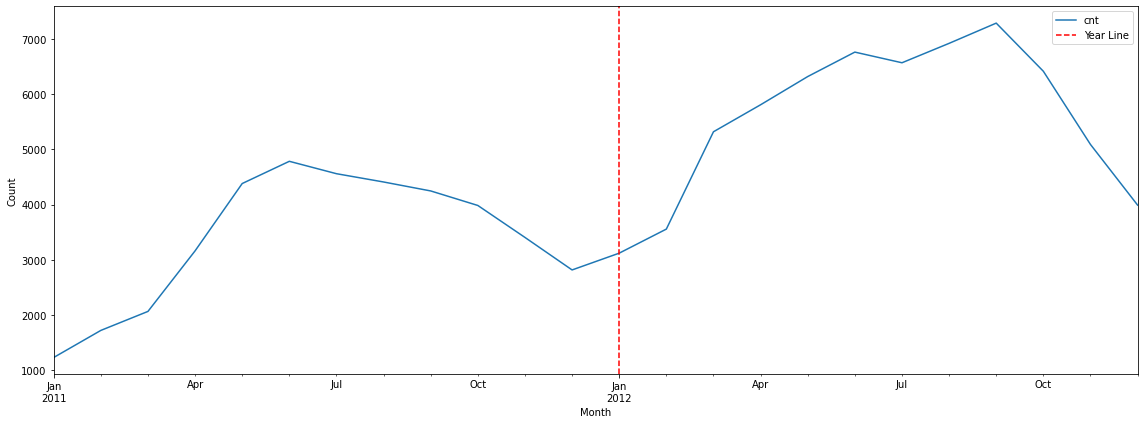

In [21]:
# Our Data shows a clearly seasonal patter on yearly data and an upward trend
# We can see that clealry by plotting monthly mean data
plotSeries(df_day.resample("M").mean()["cnt"], xlabel="Month", ylabel="Count")

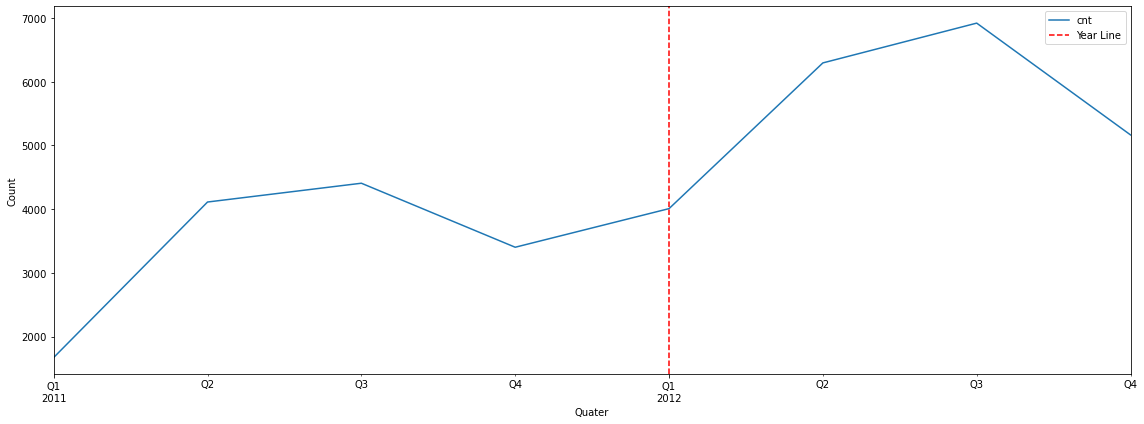

In [22]:
# PLotting data quarterly
plotSeries(df_day.resample("Q").mean()["cnt"], xlabel="Quater", ylabel="Count")

In [ ]:
# From above plot we can we that our model posses the trend and seasonality in weekly, monthly & quartly wise

In [26]:
# QQ diagram

# normality was evaluated by Shapiro–Wilk (S-W) test

In [25]:
# frequency distribution histogram

In [17]:
# Correlation of Different Columns with cnt

C:\Users\JafarSaadiq\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


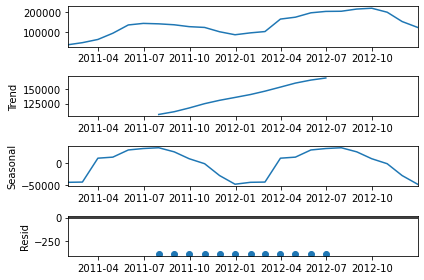

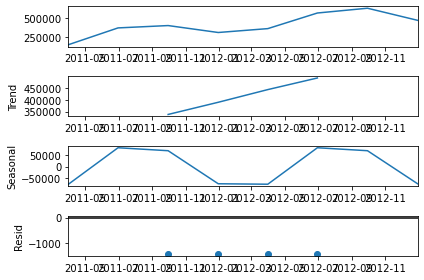

In [27]:
# Trend & Seasonality Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
def timeSeriesDecomposition(series):
    # Create a time series

    # Decompose the time series
    decomposition = seasonal_decompose(series, model='additive')

    # Plot the decomposed components
    decomposition.plot()
    plt.show();
timeSeriesDecomposition(df_day.resample("M").sum()[["cnt"]])
timeSeriesDecomposition(df_day.resample("Q").sum()[["cnt"]])

### SARIMA (Seasonal ARIMA) Model Implementation
- Time series data must be made stationary to remove any obvious correlation and collinearity with the past data.  

**Stationary time-series data**, the properties or value of a sample observation does not depend on the timestamp at which it is observed  
To remove this correlation, ARIMA uses differencing to make the data stationary. Differencing, at its simplest, involves taking the difference of two adjacent data points.  

We check the stationarity of the data series by applying two tests, where  we  check  the  null  hypothesis
1. unit root test Dickey-Fuller Augumented (ADF). If p-value is >0.05% means data is not stationary.
2. Phillips-Perron unit root test (PP)

To make it stationary we can apply transformation like logarithms and differentiating  
**Augmented Dickey-Fuller**, mathematical test to determine which order is best for the data.

In [112]:
filtered_df_day = df_day["cnt"]

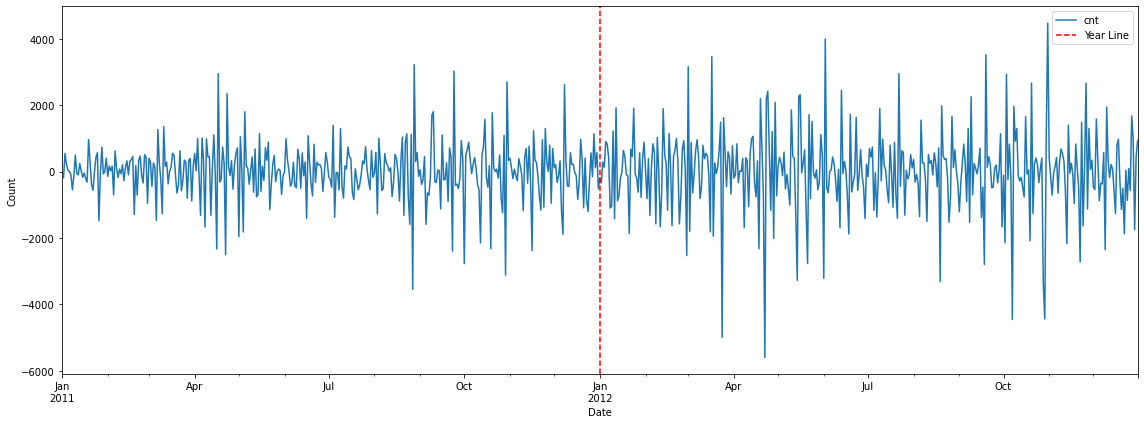

In [138]:
# 1st difference plotting
plotSeries(filtered_df_day.diff(1), xlabel="Date", ylabel="Count")

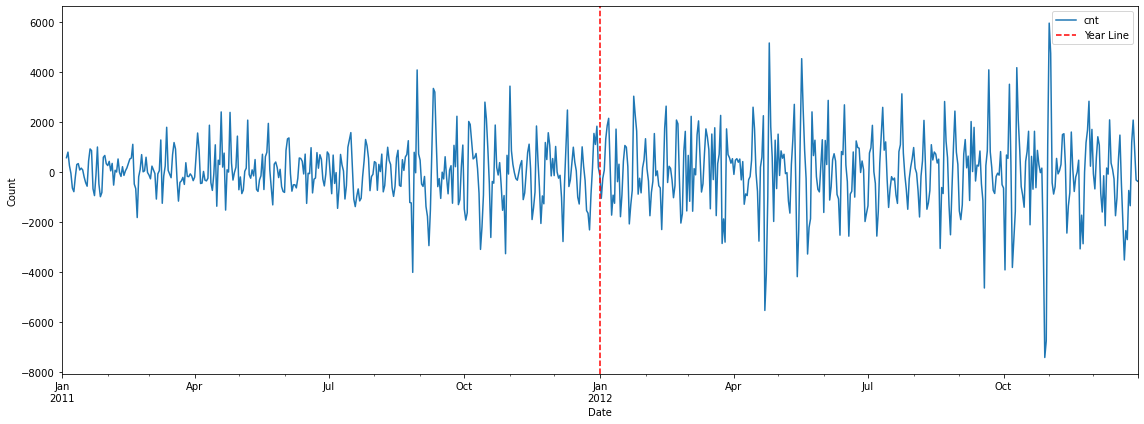

In [139]:
plotSeries(filtered_df_day.diff(3), xlabel="Date", ylabel="Count")

In [175]:
# Now lets have a ADF and PP test on it
# ADF Test 
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC", )
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    pass
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    pass

print("1st Differencing")
adf_test(filtered_df_day.diff().dropna())
print("-----------")
kpss_test(filtered_df_day.diff().dropna())

1st Differencing
Results of Dickey-Fuller Test:
Test Statistic                -1.177881e+01
p-value                        1.046780e-21
#Lags Used                     1.200000e+01
Number of Observations Used    7.170000e+02
Critical Value (1%)           -3.439503e+00
Critical Value (5%)           -2.865579e+00
Critical Value (10%)          -2.568921e+00
dtype: float64
-----------
Results of KPSS Test:
Test Statistic             0.225558
p-value                    0.100000
Lags Used                111.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**Maximum Likelihood Estimation (MLE)**, define it    

**Autocorrelation function (ACF)**,  
*Patterns and Insights*:
- Seasonal Patterns: Autocorrelation plots often reveal seasonal patterns. You might see peaks or valleys in the ACF plot at regular intervals, indicating seasonality in the data.
- Trend Information: The ACF plot can provide insights into the presence of trends in the data. If autocorrelation coefficients decrease slowly as the lag increases, it suggests a trend.
- Stationarity: For a stationary time series, autocorrelation coefficients should generally decrease rapidly and approach zero as lags increase.
- Model Selection: Autocorrelation plots can help you identify the order of autoregressive (AR) and moving average (MA) components when fitting time series models like ARIMA.  



**Partial Autocorrelation function (ACF)**,  

**Normalized Bayesian Information Criteria (BIC)**, was used to determine the degree of overfitting.  


In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

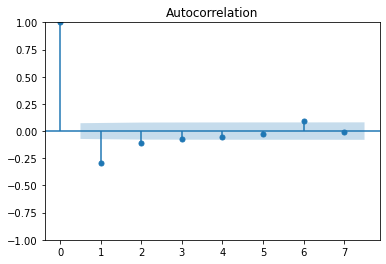

In [219]:
# The ACF plot helps you determine the order of the moving average (q). Look for the point at which the ACF plot 
# crosses the significance threshold for the first time (usually a dashed line). This indicates the order of q.
plot_acf(filtered_df_day.diff().dropna(), lags=7);
# try, q = [1, 2, 6]

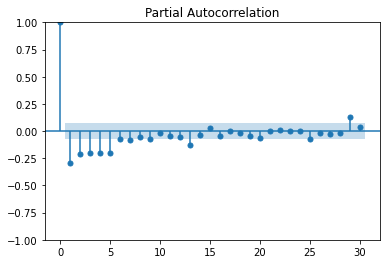

In [221]:
# The PACF plot helps you determine the order of the autoregressive (p). Look for the point at which the PACF plot 
# crosses the significance threshold for the first time. This indicates the order of p.
plot_pacf(filtered_df_day.diff().dropna(), method="ywm", lags=30);
# try p = [1, 2, 3, 4, 5, 13, 29]

In [222]:
# Data Cleaning & Transformation
# Does our data exhibits seasonality or trend
# Try different Stationarize methods 
#     1. differencing (first, second, or seasonal differences) and logarithmic transformations.
# Evaluate model's performance using metrics such as 
#     1. Mean Absolute Error (MAE), 
#     2. Mean Squared Error (MSE), 
#     3. Root Mean Squared Error (RMSE).
# Use Exogenous Variables too

https://www.statsmodels.org/v0.13.5/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX  
https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-023-14994-4  

In [287]:
filtered_df_day = df_day.cnt.copy()
training_data = filtered_df_day[:-60]
testing_data = filtered_df_day[-60:] # 2012-11-02 to 2012-12-31

In [288]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product

# Define the range of p, d, and q values
p_values = [1, 2, 3, 4, 5, 13, 29]
d_values = [0, 1, 2]
q_values = [1, 2, 6]

# Generate all possible combinations of p, d, and q values
param_combinations = list(product(p_values, d_values, q_values))
# Create a DataFrame with p, d, and q values
param_df = pd.DataFrame(param_combinations, columns=['p', 'd', 'q'])

# Create columns to store AIC and BIC values
param_df['AIC'] = np.nan
param_df['BIC'] = np.nan
param_df['HQIC'] = np.nan

# Loop through each row in the parameter DataFrame
for index, row in param_df.iterrows():
    p = int(row['p'])
    d = int(row['d'])
    q = int(row['q'])

    try:
        # Fit an ARIMA model
        model = sm.tsa.ARIMA(training_data, order=(p, d, q))
        results = model.fit()

        # Calculate AIC and BIC
        aic, bic, hqic = results.aic, results.bic, results.hqic

        # Update the DataFrame with AIC and BIC values
        param_df.at[index, 'AIC'] = aic
        param_df.at[index, 'BIC'] = bic
        param_df.at[index, 'HQIC'] = hqic

    except Exception as e:
        # Handle exceptions if the model cannot be fitted
        print(f"Error for p={p}, d={d}, q={q}: {e}")


C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\

C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JafarSaadiq\anaconda3\lib\site-p

In [322]:
param_df[param_df.d==1].sort_values("AIC").head(3)

,p,d,q,AIC,BIC,HQIC
5,1,1,6,11034.441533,11070.499755,11048.408272
30,4,1,1,11034.752759,11061.796425,11045.227814
40,5,1,2,11035.188103,11071.246324,11049.154842


In [323]:
param_df[param_df.d==1].sort_values("BIC").head(3)

,p,d,q,AIC,BIC,HQIC
3,1,1,1,11039.471697,11052.993530,11044.709224
12,2,1,1,11039.033895,11057.063006,11046.017265
13,2,1,2,11035.464302,11058.000691,11044.193514


In [324]:
param_df[param_df.d==1].sort_values("HQIC").head(3)

,p,d,q,AIC,BIC,HQIC
13,2,1,2,11035.464302,11058.000691,11044.193514
21,3,1,1,11035.618705,11058.155094,11044.347917
3,1,1,1,11039.471697,11052.993530,11044.709224


In [338]:
model = sm.tsa.ARIMA(training_data, order=(29, 1, 1))
res = model.fit()

In [339]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    cnt   No. Observations:                  671
Model:                ARIMA(29, 1, 1)   Log Likelihood               -5490.392
Date:                Mon, 02 Oct 2023   AIC                          11042.784
Time:                        07:29:28   BIC                          11182.509
Sample:                    01-01-2011   HQIC                         11096.905
                         - 11-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0955      0.235     -0.407      0.684      -0.555       0.364
ar.L2         -0.2610      0.138     -1.886      0.059      -0.532       0.010
ar.L3         -0.2754      0.136     -2.029      0.043      -0.541      -0.009
ar.L4         -0.2555      0.133     -1.925      0.054      -0.516       0.005
ar.L5         -0.2283      0.134     -1.700      0.089      -0.492       0.035
ar.L6         -0.0944      0.125     -0.756      0.450      -0.339       0.150
ar.L7         -0.1741      0.091     -1.915      0.056      -0.352       0.004
ar.L8         -0.1309      0.094     -1.387      0.166      -0.316       0.054
ar.L9         -0.1550      0.086     -1.799      0.072      -0.324       0.014
ar.L10        -0.0735      0.082     -0.891      0.373      -0.235       0.088
ar.L11        -0.0932      0.075     -1.250      0.211      -0.239       0.053
ar.L12        -0.0797      0.073     -1.096      0.273      -0.222       0.063
ar.L13        -0.0766      0.069     -1.103      0.270      -0.213       0.060
ar.L14        -0.0023      0.067     -0.034      0.973      -0.133       0.129
ar.L15        -0.0130      0.063     -0.208      0.835      -0.136       0.110
ar.L16        -0.0555      0.053     -1.045      0.296      -0.160       0.049
ar.L17      3.824e-05      0.055      0.001      0.999      -0.109       0.109
ar.L18        -0.0203      0.053     -0.381      0.704      -0.125       0.084
ar.L19        -0.0331      0.059     -0.557      0.577      -0.150       0.083
ar.L20        -0.0093      0.064     -0.144      0.885      -0.135       0.117
ar.L21         0.0711      0.056      1.279      0.201      -0.038       0.180
ar.L22         0.0571      0.049      1.160      0.246      -0.039       0.154
ar.L23         0.0059      0.057      0.103      0.918      -0.105       0.117
ar.L24         0.0230      0.054      0.423      0.672      -0.084       0.130
ar.L25        -0.0068      0.052     -0.130      0.896      -0.109       0.095
ar.L26         0.0719      0.052      1.374      0.169      -0.031       0.175
ar.L27         0.0354      0.045      0.780      0.436      -0.054       0.125
ar.L28         0.0826      0.041      2.034      0.042       0.003       0.162
ar.L29         0.1725      0.040      4.362      0.000       0.095       0.250
ma.L1         -0.4834      0.239     -2.018      0.044      -0.953      -0.014
sigma2      7.979e+05   3.34e+04     23.908      0.000    7.33e+05    8.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               912.54
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.40   Skew:                            -1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using t

In [340]:
predictions = res.predict(start="2012-11-02", end="2012-12-31")

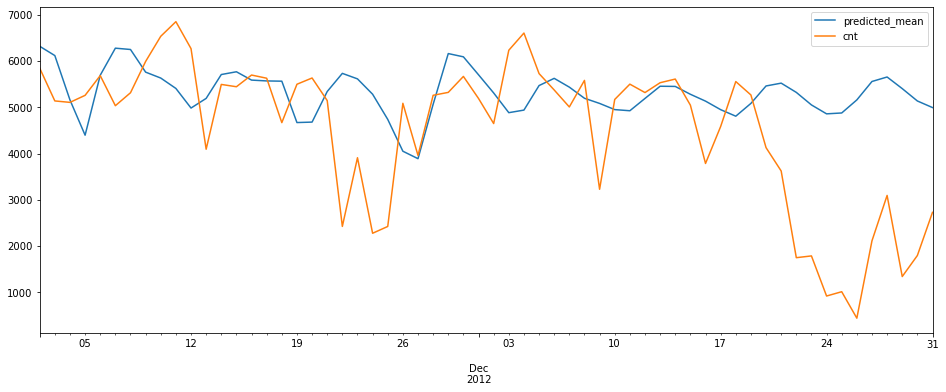

In [341]:
pd.concat([predictions, testing_data], axis=1).plot(figsize=(16, 6));

In [352]:
731-60

671

#### Finding P,D,Q,m

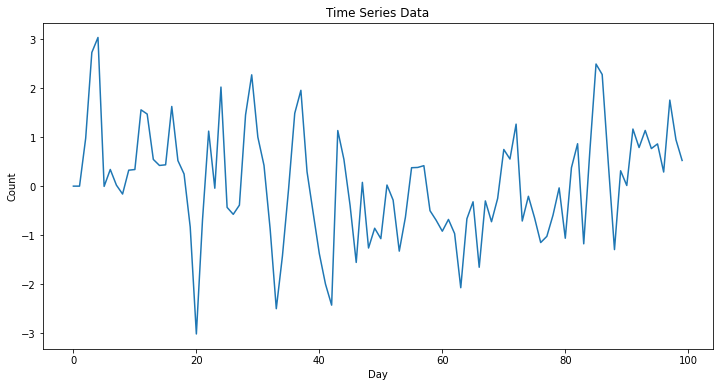

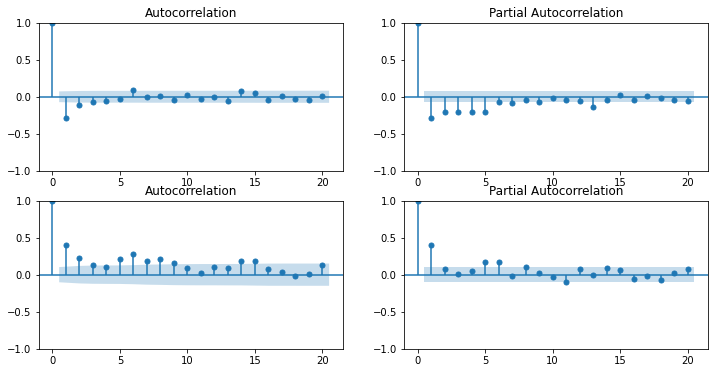

In [342]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# https://stats.stackexchange.com/questions/592851/choosing-right-value-of-m-in-sarima-models
m = 365 # As our data is daily and it has yearly seasonality

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data)  # Replace 'data' with your time series data
plt.title('Time Series Data')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

# Perform differencing
data_diff = filtered_df_day.diff().dropna()  # Regular differencing
data_seasonal_diff = filtered_df_day.diff(m).dropna()  # Seasonal differencing with period 'm'

# ACF and PACF plots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(data_diff, lags=20, ax=axes[0, 0])
sm.graphics.tsa.plot_pacf(data_diff, method='ywm', lags=20, ax=axes[0, 1])
sm.graphics.tsa.plot_acf(data_seasonal_diff, lags=20, ax=axes[1, 0])
sm.graphics.tsa.plot_pacf(data_seasonal_diff, method='ywm', lags=20, ax=axes[1, 1])
plt.show()

In [ ]:
# Define the range of P, D, and Q values
P_values = [1]
D_values = [1]
Q_values = [1]

# def findingBestModel():
# Generate all possible combinations of p, d, and q values
param_combinations = list(product(P_values, D_values, Q_values))
# Create a DataFrame with p, d, and q values
param_df = pd.DataFrame(param_combinations, columns=['P', 'D', 'Q'])

# Create columns to store AIC and BIC values
param_df['AIC'] = np.nan
param_df['BIC'] = np.nan
param_df['HQIC'] = np.nan

# Loop through each row in the parameter DataFrame
for index, row in param_df.iterrows():
    p = int(row['P'])
    d = int(row['D'])
    q = int(row['Q'])
    print(f"Working on p={p}, d={d}, q={q}")

    try:
        # Fit an SARIMA model
        model = SARIMAX(training_data, order=(29, 1, 1), seasonal_order=(p, d, q, m), 
                   seasonality_mode='multiplicative') # 12 for monthly data suggests a yearly seasonal cycle.
        res = model.fit()

        # Calculate AIC and BIC
        aic, bic, hqic = results.aic, results.bic, results.hqic

        # Update the DataFrame with AIC and BIC values
        param_df.at[index, 'AIC'] = aic
        param_df.at[index, 'BIC'] = bic
        param_df.at[index, 'HQIC'] = hqic

    except Exception as e:
        # Handle exceptions if the model cannot be fitted
        print(f"Error for p={p}, d={d}, q={q}: {e}")


In [ ]:
param_df

In [350]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(training_data, order=(29, 1, 1), seasonal_order=(1, 1, 1, 365),  
                seasonality_mode='multiplicative') # 12 for monthly data suggests a yearly seasonal cycle.
res = model.fit()

ValueError: Invalid model: autoregressive lag(s) {24} are in both the seasonal and non-seasonal autoregressive components.

In [ ]:
predictions = res.predict(start="2012-11-02", end="2012-12-31")

In [ ]:
pd.concat([predictions, testing_data], axis=1).plot(figsize=(16, 6));

### XGBOOST Implementation

In [68]:
df_day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


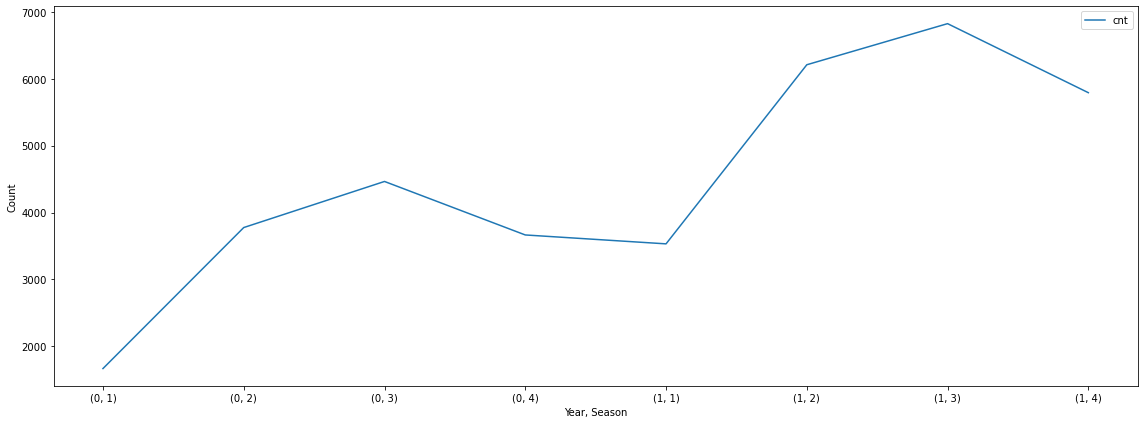

In [69]:
# Season wise PLot
plotSeries(df_day.groupby(["yr", "season"]).mean()["cnt"], xlabel="Year, Season", ylabel="Count")

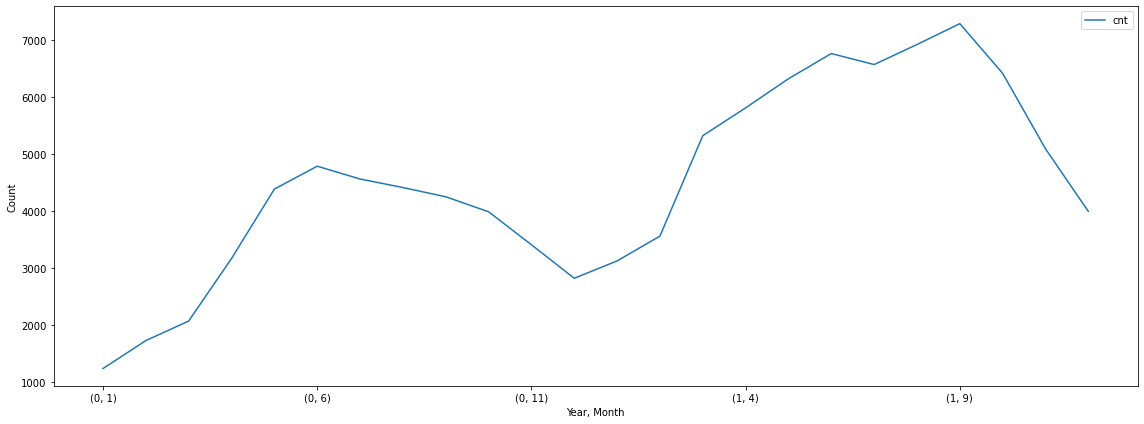

In [70]:
# Monthly PLot
plotSeries(df_day.groupby(["yr", "mnth"]).mean()["cnt"], xlabel="Year, Month", ylabel="Count")

**We can clearly see a pattern/season and trend**

In [71]:
# Box plot for Holiday
# df_day.plot(kind="box");

In [72]:
# Correlation between [temp, atemp, hum, windspeed, casual, registered] and cnt

In [73]:
df_day[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [76]:
# No use column
df_day.drop(columns="instant", inplace=True)

In [77]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [78]:
# take 2 months data
# ["season", "yr", "mnth", "holiday", "weekday", "workingday", "cnt"]-> If we only use these columns 
# prediction will drop a lot
train = df_day[:-31]
test = df_day[-31:]

X_train = train.drop('cnt', axis =1)
y_train = train['cnt']

X_test = test.drop('cnt', axis =1)
y_test = test['cnt']

In [79]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_ca

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

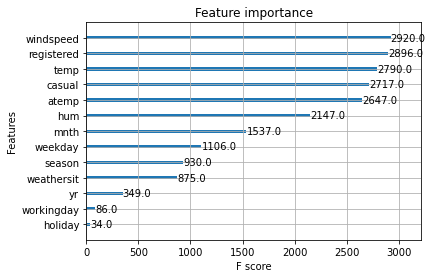

In [80]:
xgb.plot_importance(reg)

In [81]:
test['cnt_Prediction'] = reg.predict(X_test)

C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\JafarSaadiq\anaconda3\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_ca

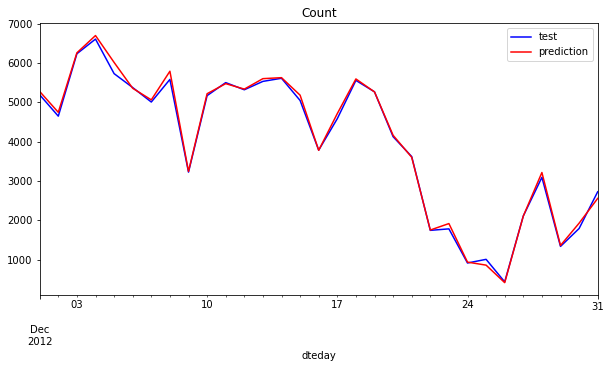

In [82]:
# train['cnt'].plot(style='k', figsize=(10,5), label = 'train')
test['cnt'].plot(style='b', figsize=(10,5), label = 'test')
test['cnt_Prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('Count')
plt.legend();

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print('RMSE: ', round(mean_squared_error(y_true=test['cnt'],y_pred=test['cnt_Prediction']),3))
print('MAE: ', round(mean_absolute_error(y_true=test['cnt'],y_pred=test['cnt_Prediction']),3))
print('MAPE: ', round(mean_absolute_percentage_error(y_true=test['cnt'],y_pred=test['cnt_Prediction']),3))

RMSE:  9766.986
MAE:  71.036
MAPE:  0.025


In [84]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


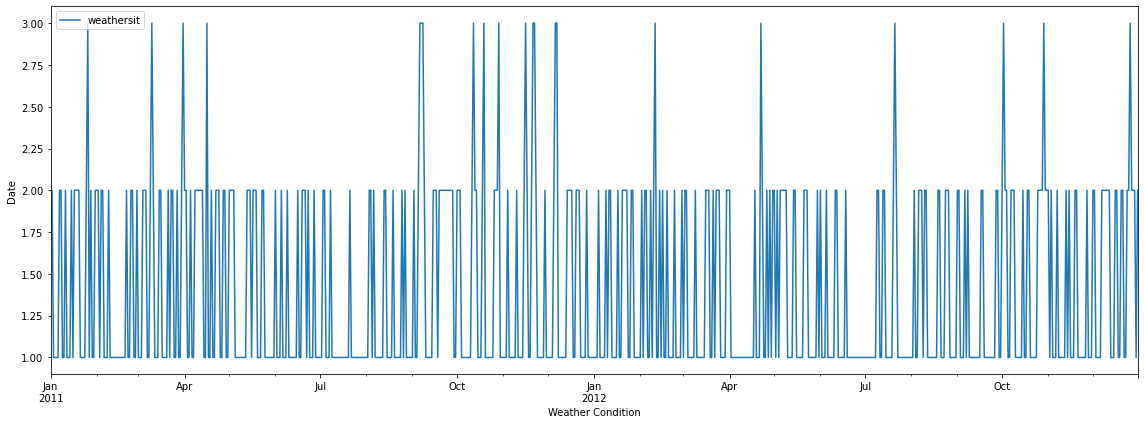

In [85]:
plotSeries(df_day.weathersit, xlabel="Weather Condition", ylabel="Date")

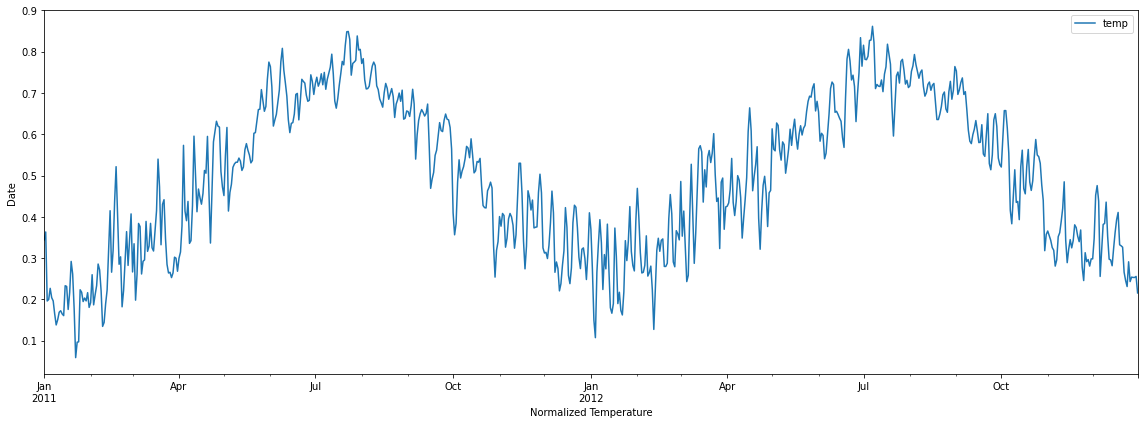

In [86]:
plotSeries(df_day.temp, xlabel="Normalized Temperature", ylabel="Date")

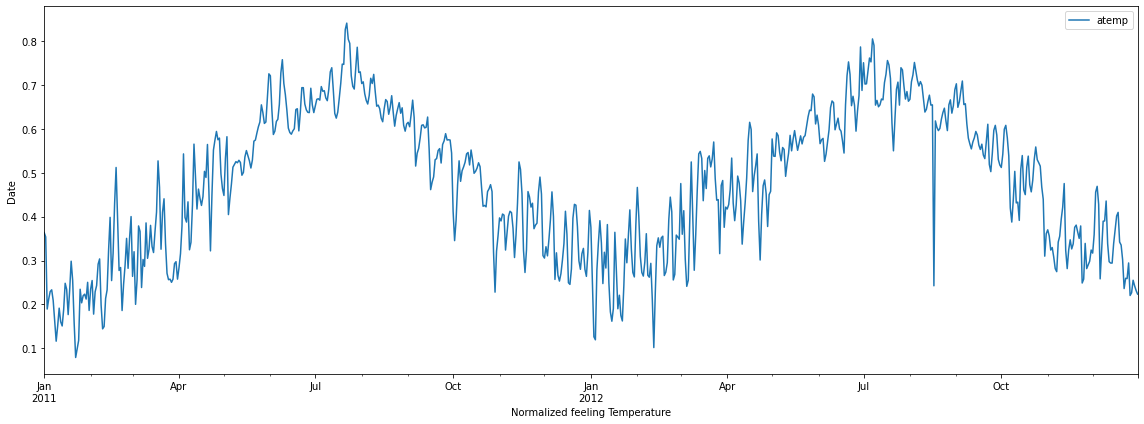

In [87]:
plotSeries(df_day.atemp, xlabel="Normalized feeling Temperature", ylabel="Date")

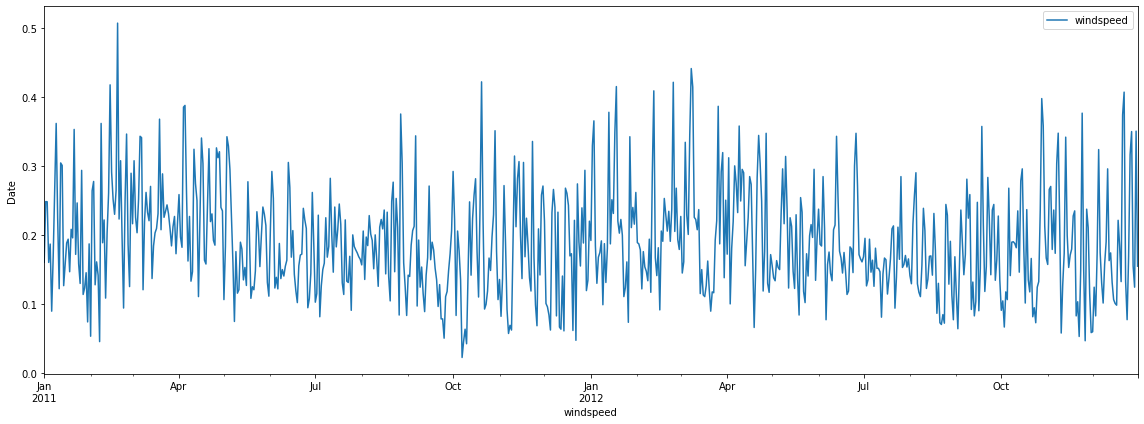

In [88]:
plotSeries(df_day.windspeed, xlabel="windspeed", ylabel="Date")

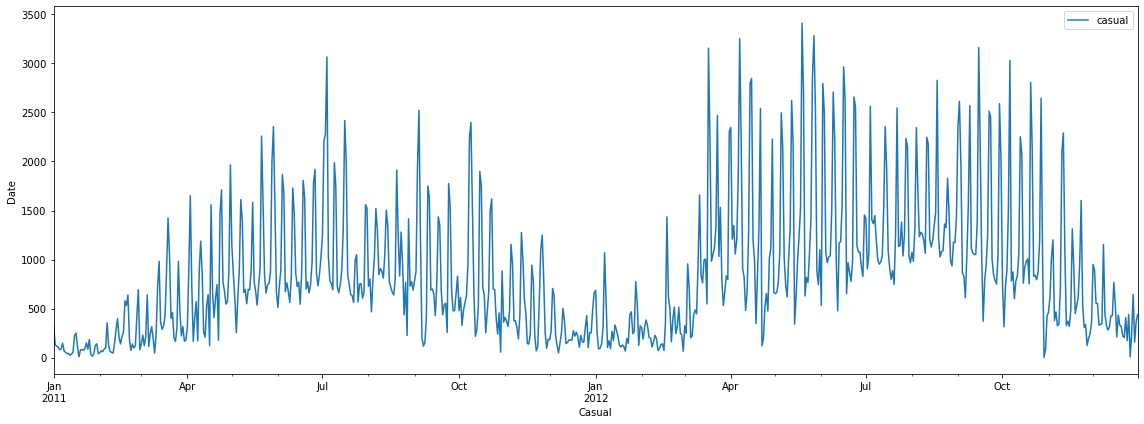

In [89]:
plotSeries(df_day.casual, xlabel="Casual", ylabel="Date")

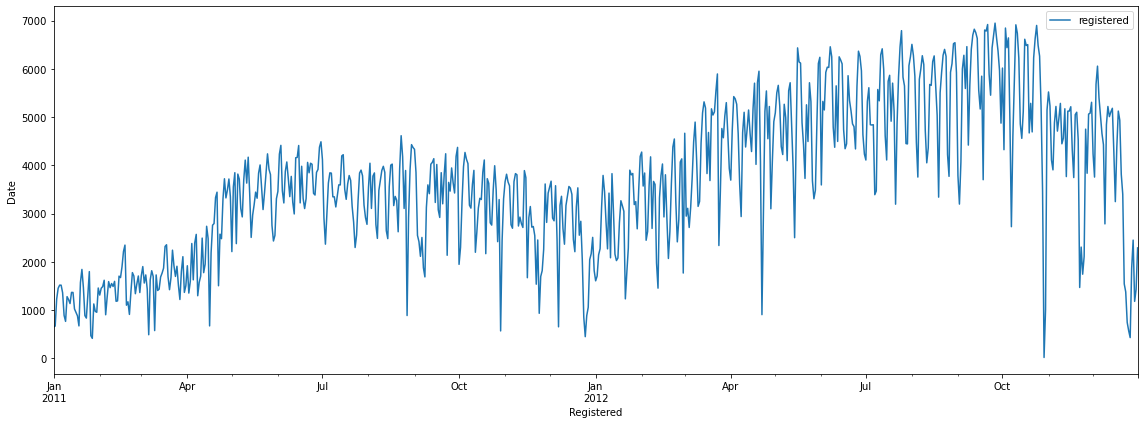

In [90]:
plotSeries(df_day.registered, xlabel="Registered", ylabel="Date")

### LSTM Implementation

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 

In [92]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
data = df_day.copy()

### Hour Data Analysis

In [ ]:
df_hour.head()